## 패키지 설치

In [268]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.api import OLS
import stemgraphic
from scipy import stats
import statistics
import math
from statsmodels.stats.anova import anova_lm
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

# 3-4

### (b)

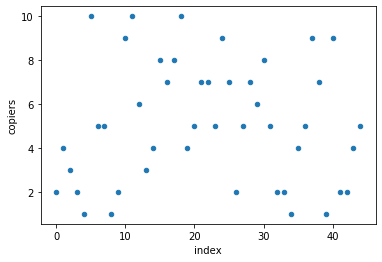

In [257]:
# Time plot 그리기

data = pd.read_table("copier_maintenance.txt", header=None, names = ["minutes", "copiers"])

df = pd.DataFrame(data)

df.head()

df.reset_index().plot(kind="scatter", x="index", y="copiers")

### 해석

시간 순서대로 산점도를 표시해보았으나 시간에 의한 관계성이 보인다기보다는 랜덤으로 배치가 되어있는 것을 확인할 수 있었습니다.

### (c)

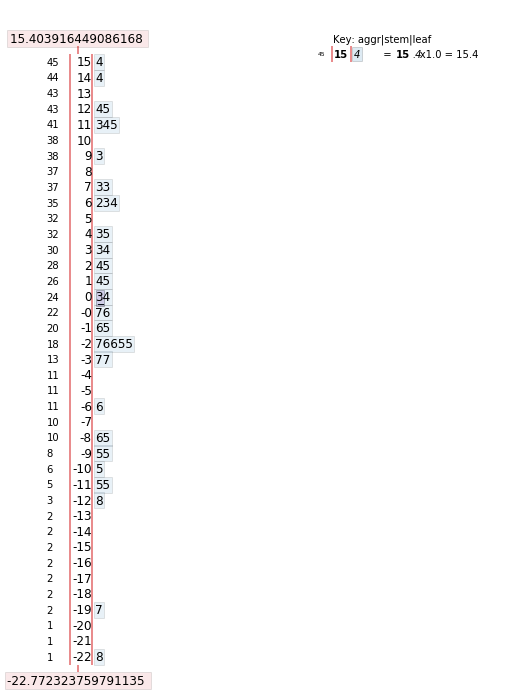

In [259]:
# Stem and leaf 그래프(잔차)

x_values = df["copiers"][:, np.newaxis] # 카피머신 개수
y_values = df["minutes"][:, np.newaxis] # 서비스 시간

reg = smf.ols('minutes ~ copiers', data=df).fit() # 회귀식
reg.summary() # 회귀식 요약

y_pred = reg.fittedvalues.copy() # 회귀식으로 예측한 값
y_val = df['minutes'].values.copy() # 실제 관측값
residuals = y_val - y_pred # 위 둘을 뺀 잔차값

fig, ax = stemgraphic.stem_graphic(residuals) # stem and leaf 그래프 그리는 함수

### 해석

stem and leaf 그래프를 그려본 결과 -2를 중심으로 잔차가 퍼져 있는 것을 확인할 수 있습니다. 

### (d)

Text(0.5, 0, 'Fitted')

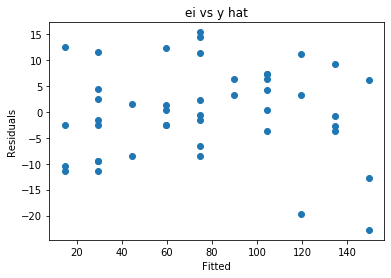

In [219]:
# 잔차 그래프

# 1. ei vs y_hat

graph1 = plt.scatter(y_pred, residuals)

plt.title("ei vs y hat")
plt.ylabel("Residuals")
plt.xlabel("Fitted")

Text(0.5, 0, 'xi')

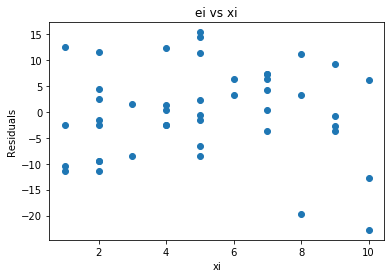

In [220]:
# 2. ei vs x

graph2 = plt.scatter(x_values, residuals)

plt.title("ei vs xi")
plt.ylabel("Residuals")
plt.xlabel("xi")

#### 해석

y hat과 xi는 서로 상관관계가 있는 독립변수와 종속변수로서 45번의 시행이 있으니 그에 비례하게 x값이 그래프에 찍히게됩니다. 그리고 y축은 residuals(잔차) 로 동일하기에 결국 x의 값만 다를 뿐 그래프의 모양은 동일하게 나오게 됩니다.

### (e)

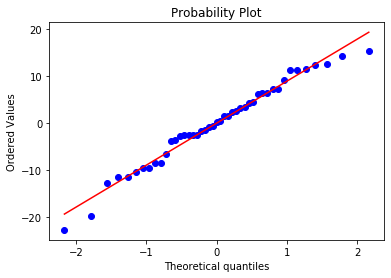

잔차와 예상값과의 상관관계 : 0.9891503730415449


In [221]:
# 정규 확률 누적 분포도

fig, ax = plt.subplots(1, 1)
_, (__, ___, r) = stats.probplot(residuals, plot=ax, fit=True)
plt.show()

print("잔차와 예상값과의 상관관계 : {0}".format(r))

### 해석

잔차에 대한 정규 누적 분포도는 위와 같이 나옵니다. 붉은 라인을 따라 어느정도 누적 분포가 구성되어 있기 때문에 어느정도의 정규성은 지니고 있다고 볼 수 있습니다.
또한 잔차(y vlaue)와 예상값(x value)의 상관관계는 0.9891503730415449입니다. 문제에서 참고하라고 했던 Table B.6을 통해 보면 전체 사이즈의 개수는 45개이고 임계값은 0.979입니다. 상관관계 값인 0.989...가 임계값보다 크기 때문에 정규성을 이룬다고 할 수 있습니다.

### (f)

Text(0.5, 0, 'Number of copiers')

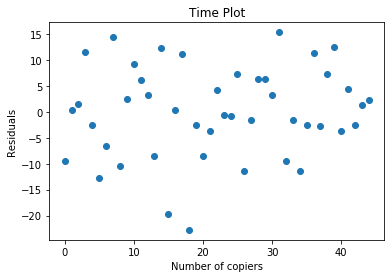

In [293]:
x_values = df["copiers"][:, np.newaxis]
y_values = df["minutes"][:, np.newaxis]


model = LinearRegression()

model.fit(x_values, y_values)
y_pred = model.predict(x_values)

residuals = y_values - y_pred

scatter = plt.scatter(df.index.values, residuals)

plt.title("Time Plot")
plt.ylabel("Residuals")
plt.xlabel("Number of copiers")

### 해석

그래프를 그려본 결과 잔차는 시간 순서에 영향을 받지 않음을 확인할 수 있습니다.

### (g)

In [294]:
# Breusch-Pagan 테스트 

#1단계
sse = sum(residuals**2)

# 2단계

lm = LinearRegression()

lm.fit(x_values, residuals**2)

y_hat = lm.predict(x_values)

ssr = sum((y_hat - np.mean(residuals**2))**2)

sse = sum(residuals**2)

# 3단계
x_bp = (ssr / 2) / (sse / 45)**2

print("SSR : {0}".format(ssr[0]))
print("SSE : {0}".format(sse[0]))
print("X2BP : {0}".format(x_bp[0]))

SSR : 15155.020167552286
SSE : 3416.377023498695
X2BP : 1.3146797263175305


### 해석

브루쉬 파간 테스트를 진행하기 위해 귀무가설과 대립가설을 만들어줍니다.

귀무가설(H0) : r1 = 0, 잔차는 x에 대해 영향을 받지 않습니다.
대립가설(H1) : r1 != 0, 잔차는 x에 대해 영향을 받습니다.

문제에 언급된 Table B.3에서 유의수준 0.05에서 임계값 .95를 찾아보면 값이 3.84입니다. 위에서 계산한 x_bp의 값이 1.31467973의 값이 표에서 찾아본 3.84보다 작으므로 대립가설을 기각하고, 귀무가설을 채택합니다. 결국 잔차는 x인 카피머신의 개수에 영향을 받지 않음을 알 수 있습니다. 

### (h)

In [224]:
# 열 추가해서 비교

data2 = pd.read_table("Q3_4.txt", header = None, names = ["minutes", "copiers", "age", "year"])

df2 = pd.DataFrame(data2)

df2.head()

,minutes,copiers,age,year
0,20,2,20,4
1,60,4,19,5
2,46,3,27,4
3,41,2,32,1
4,12,1,24,4


Text(0.5, 0, 'X2(age)')

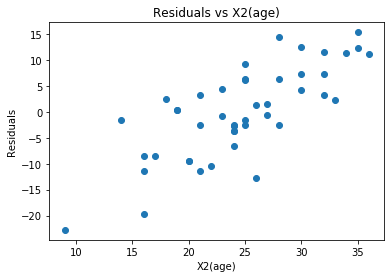

In [225]:
# residual vs x2(age)

x_values = df2["age"][:, np.newaxis]

graph3 = plt.scatter(x_values, residuals)

plt.title("Residuals vs X2(age)")
plt.ylabel("Residuals")
plt.xlabel("X2(age)")

Text(0.5, 0, 'X3(year)')

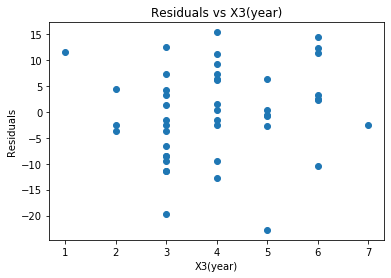

In [226]:
# residuals vs x3(year)

x_values = df2["year"][:, np.newaxis]

graph3 = plt.scatter(x_values, residuals)

plt.title("Residuals vs X3(year)")
plt.ylabel("Residuals")
plt.xlabel("X3(year)")

### 해석

우선 첫번째 x2를 잔차와 상관관계 그래프를 그린 것에서 선형관계가 있는 것을 시각적으로 확인할 수 있습니다. 선형성이 있기 때문에 기존에 X0와 X1 컬럼만 있는 기존 데이터에 X2를 추가한다면 랜덤으로 퍼져있는 것에서 선형성을 얻을 수 있기에 회귀식은 의미를 가질 수 있습니다.
두번째 그래프에서는 year 컬럼을 추가해서 잔차와의 상관관계를 그려보았는데, 첫번째 그래프와는 달리 시각적으로 특별한 속성을 찾을 수는 없었습니다. 그래서 year 컬럼을 추가하는 것은 무의미하다고 볼 수 있습니다.

# 3-5

### (b)

In [227]:
# 데이터 불러오기

airfreight_breakage = pd.read_table("Airfreight_breakage.txt", header = None, names = ["broken ampules", "transfers"])

airfreight_df = pd.DataFrame(airfreight_breakage)

airfreight_df.head()

,broken ampules,transfers
0,16.0,1.0
1,9.0,0.0
2,17.0,2.0
3,12.0,0.0
4,22.0,3.0


Text(0, 0.5, 'Transfers')

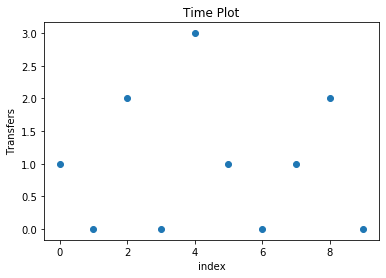

In [228]:
# Airfreight breakage Time plot 그리기

transfers = airfreight_df["transfers"][:, np.newaxis] 
ampules = airfreight_df["broken ampules"][:, np.newaxis]

plt.scatter(airfreight_df.index.values, transfers)

plt.title("Time Plot")
plt.xlabel("index")
plt.ylabel("Transfers")

### 해석

그래프를 그려보았을 때 시간순서와는 전혀 상관관계가 없다고 결론지을 수 있었습니다.

### (c)

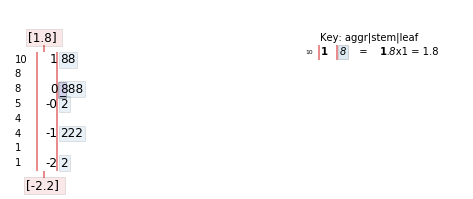

In [229]:
# Airfreight breakage Stem-and-Leaf 그리기

model = LinearRegression() # 회귀식

model.fit(transfers, ampules) # 학습

ampules_pred = model.predict(transfers) # 예측값

ampules_residuals = ampules - ampules_pred # 잔차 계산

figure, axis = stemgraphic.stem_graphic(ampules_residuals) # stem and leaf 그래프 그리는 함수

### 해석

그나마 0과 -1 부근에 많고 잔차가 전체적으로 퍼져있는 것을 확인할 수 있습니다. 

### (d)

Text(0, 0.5, 'Residuals')

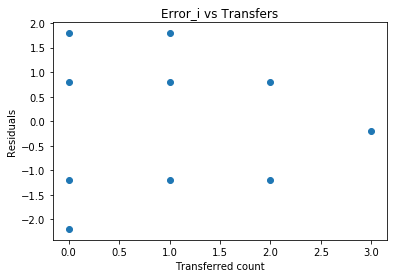

In [230]:
airfreight_plot = plt.scatter(transfers, ampules_residuals)

plt.title("Error_i vs Transfers")
plt.xlabel("Transferred count")
plt.ylabel("Residuals")

### 해석

선형성이 보이지 않아서 현재 회귀식이 의미가 있다고 판단하기 어렵습니다.

# 3-6

### (b)

In [231]:
# 데이터 불러오기

plastic_data = pd.read_table("plastic_hardeness.txt", header = None, names = ["hardness","hours"])

plastic_df = pd.DataFrame(plastic_data)

plastic_df.head()

,hardness,hours
0,199.0,16.0
1,205.0,16.0
2,196.0,16.0
3,200.0,16.0
4,218.0,24.0


Text(0, 0.5, 'Residuals')

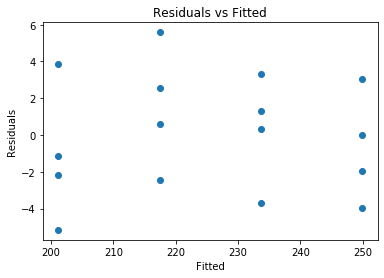

In [232]:
hardness = plastic_df["hardness"][:, np.newaxis]# y 값
hours = plastic_df["hours"][:, np.newaxis] # x 값

lm = LinearRegression()

lm.fit(hours, hardness)

y_hat = lm.predict(hours)

residuals = hardness - y_hat

scatter = plt.scatter(y_hat, residuals)

plt.title("Residuals vs Fitted")
plt.xlabel("Fitted")
plt.ylabel("Residuals")

### 해석

Residual이 Fitted value인 y_hat에 대해서 시각적으로만 확인해보았을 때 등분산을 이루고 있어 보입니다. 

### (e)

In [288]:
# Brown-Forsythe test

cut_off_value = 24

smallerGroup = plastic_df[plastic_df["hours"] <= cut_off_value]
biggerGroup = plastic_df[plastic_df["hours"] > cut_off_value]

# x <= 24 그룹

xVal = smallerGroup["hours"][:, np.newaxis]
yVal = smallerGroup["hardness"][:, np.newaxis]

lm = LinearRegression()

lm.fit(xVal, yVal)

y_pred = lm.predict(xVal)

residual_small = yVal - y_pred

small_median = statistics.median(residual_small)

d_small = abs(residual_small - small_median)

d_small_median = statistics.median(d_small)

# x > 24 그룹

xVal2 = biggerGroup["hours"][:, np.newaxis]
yVal2 = biggerGroup["hardness"][:, np.newaxis]

lm = LinearRegression()

lm.fit(xVal2, yVal2)

y_pred2 = lm.predict(xVal)

residual_big = yVal2 - y_pred2

big_median = statistics.median(residual_big)

d_big = abs(residual_big - big_median)

d_big_median = statistics.median(d_big)

# t_bf 구하기

s = math.sqrt((sum((d_small - d_small_median)**2) + sum((d_big - d_big_median)**2)) / 14)

t_bf = (d_small_median - d_big_median) / s*(1/8 + 1/8) 

print("T*bf : {:.5f}".format(t_bf[0]))

T*bf : 0.05186


### 해석

우선 cut off value 인 24를 기준으로 데이터를 두 그룹으로 나눈 다음 여러 계산 과정을 거쳐 T*bf의 값이0.05186086이 나왔습니다.
4단계인 귀무가설과 대립가설을 나누어줍니다.

    귀무가설 : |T*bf| <= t(1- 0.05/2 ; 16 – 2)

    대립가설 : |T*bf| > t(1- 0.05/2 ; 16 – 2)
    
테이블 B.2에서 보면 유의수준 0.05, 자유도 14(16-2)의 값을 통해 2.145의 검정값이 나옵니다. T*bf의 값은 위에서 반환했듯이 0.05186086이므로 검정값보다 작기 때문에 귀무가설을 기각하게 됩니다. 그래서 등분산 가정이 성립하고 회귀식은 의미가 있다고 결론지을 수 있습니다.

# 3-13

### (a)

귀무가설(H0) : E{Y} = $\beta$0 + $\beta$1 * X
    
대립가설(Ha) : E{Y} != $\beta$0 + $\beta$1 * X

### (b)

In [376]:
data = pd.read_table("copier_maintenance.txt", header=None, names = ["minutes", "copiers"])

df = pd.DataFrame(data)

copiers = df["copiers"][:, np.newaxis] # x
minutes = df["minutes"][:, np.newaxis] # y

full_model = ols("minutes ~ copiers", data = df).fit()

df["intercept"] = 1
reduced_model = ols("minutes ~ intercept + C(copiers)", data=df).fit()

anova_lm(full_model)

,df,sum_sq,mean_sq,F,PR(>F)
copiers,1.0,76960.422977,76960.422977,968.657196,4.009032e-31
Residual,43.0,3416.377023,79.450628,NaN,NaN


### 해석



### (c)

# 3-18

### (a)

Text(0, 0.5, 'time(hours)')

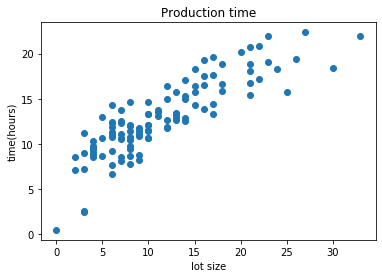

In [235]:
df = pd.read_table("production_time.txt", header = None, names = ["time", "lot_size"])

df.head()

time = df["time"][:, np.newaxis] # y 값
lot_size = df["lot_size"][:, np.newaxis] # x값

plt.scatter(lot_size, time)

plt.title("Production time")
plt.xlabel("lot size")
plt.ylabel("time(hours)")

### 해석

production_time 데이터를 그래프로 그려보면 산점도가 선형성이 없는 것을 시각적으로 확인할 수 있습니다. 그러나 대략적으로 등분산은 유지하고 있기 때문에 X값만 변환하는 것이 옳을 것 같습니다.

### (b)

In [236]:
root_lot_size = np.sqrt(lot_size)

lm = LinearRegression().fit(root_lot_size, time)

beta_0 = lm.coef_[0]
beta_1 = lm.intercept_

print("Regression Line : {:.2f} + {:.2f} x X".format(beta_0[0], beta_1[0]))

Regression Line : 3.62 + 1.25 x X


### (c)

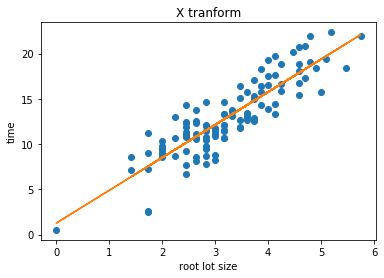

In [260]:
# x변환 후 회귀식 

root_lot_size = np.sqrt(lot_size)

lm = LinearRegression().fit(root_lot_size, time)

y_hat = lm.predict(root_lot_size)

# 산점도
plt.plot(root_lot_size, time, "o")

# 회귀식
plt.plot(root_lot_size, y_hat, "-")


plt.title("X tranform")
plt.xlabel("root lot size")
plt.ylabel("time")

plt.show()

### 해석

x에 루트를 씌워서 변환해서 그래프를 그려봤더니 회귀식과 비교하니 시각적으로 봐도 선형성을 유지하는 것을 확인할 수 있었습니다.

### (d)

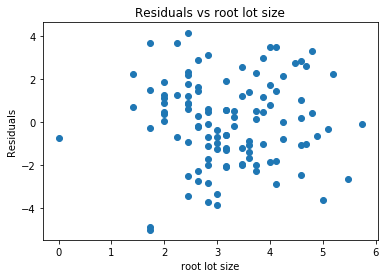

In [261]:
# 잔차 그래프

root_lot_size = np.sqrt(lot_size)

lm = LinearRegression().fit(root_lot_size, time)

y_hat = lm.predict(root_lot_size)

residuals = time - y_hat

plt.scatter(root_lot_size, residuals)

plt.title("Residuals vs root lot size")
plt.xlabel("root lot size")
plt.ylabel("Residuals")

plt.show()

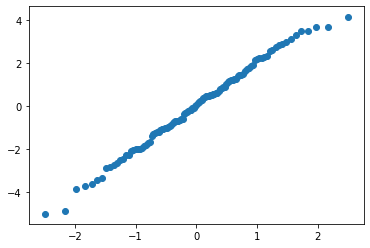

In [276]:
# 정규 확률 누적 분포도

mu = 0
std = 1
rv = stats.norm(mu, std)

residuals_sorted = np.sort(residuals)

position = _calc_uniform_order_statistic_medians(len(residuals))

qf = rv.ppf(position)

plt.scatter(qf, residuals_sorted)

### 해석

상단 잔차 그래프를 보면 잔차들이 랜덤하게 잘 분포되어 있는 것을 확인할 수 있습니다. 그리하여, 루트 x 같은 x 변환을 사용해서 만든 회귀식이 올바르게 만들어졌음을 알 수 있습니다. 
하단 정규 확률 누적 분포도를 보면 X변환을 한 후의 회귀식이 정규성을 따르고 있음을 알 수 있습니다.

### (e)

In [284]:
# x변환 후 회귀식 

root_lot_size = np.sqrt(lot_size)

lm = LinearRegression().fit(root_lot_size, time)

beta_1 = lm.coef_[0][0] # 기울기
beta_0 = lm.intercept_[0] # 절편

y_hat = lm.predict(root_lot_size)

print("Y_hat = {:.2f} + {:.2f} x rootX".format(beta_0, beta_1))

Y_hat = 1.25 + 3.62 x rootX


## 3-19

### 해석

    1. Residuals vs Yi => positive relation
    2. Residuals vs Y_hat => no relation
    
잔차는 관측값에서 예측값을 뺀 값입니다. 1번 그래프에서는 양의 관계가 나오는 이유는 앞서 말한 식을 참고하면 residuals = Yi - Y_hat이기에 비례할 수 밖에 없습니다. 그래서 양의 관계가 나옵니다. 그와 반대로 2번째 식에서 아무런 상관성이 없다는 것은 랜덤으로 분포되어 있는 것이 회귀식이 의미가 있다는 것입니다. 결국 1번째 양의 관계성은 당연한 결과이므로 2번째 결과와 같이 아무런 상관성이 없음을 보인 것이 더 중요한 정보입니다.